# SVD Image Compression, Explained

**Singular Value Decomposition** (**SVD**) is a fundamental concept in linear algebra, and it is particularly important in the field of machine learning for tasks such as dimensionality reduction, data compression, and noise reduction.

In this blog, I'll explain one possible use case of SVD: image compression. This blog aims to demystify the complexities of SVD and demonstrate how it elegantly simplifies and compresses images without significant loss of quality. Whether you're a seasoned data scientist or a curious student, SVD can have incredible potential when applied to many projects.

A copy of this blog post is located at my [GitHub repo](https://github.com/dmicz/devblognotebooks) in .ipynb format.

![png](svd_compression_files/svd_compression_19_0.png)

## Table of Contents
* [Singular Value Decomposition](#singular-value-decomposition)
* [Approximations Using SVD](#approximations-using-svd)
* [Image Compression](#image-compression)
* [JPEG?](#jpeg)


## Singular Value Decomposition

One of the most important concepts in linear algebra is singular value decomposition, which is a matrix factorization technique that factors any matrix into three distinct matrices.

$$
    \mathbf{A} = \mathbf{U\Sigma V^\mathsf{T}}
$$

We can apply this decomposition to any $m \times n$ matrix $\mathbf A$, which results in three matrices:
- $\mathbf U$: This is an $m \times m$ orthogonal matrix. The columns of this matrix are the left-singular vectors of $\mathbf A$.
- $\mathbf \Sigma$: This is an $m \times n$ diagonal matrix. The diagonal values are denoted $\sigma_i$ and are called the *singular values* of $\mathbf A$.
- $\mathbf V^\mathsf{T}$: This is an $n \times n$ transposed orthogonal matrix. The columns of the non-transposed matrix, $\mathbf V$, are the right-singular vectors of $\mathbf A$. 

We can compute this decomposition by analyzing the eigenvalues and eigenvectors of $\mathbf{A^\mathsf{T}A}$ and $\mathbf{AA^\mathsf{T}}$, the eigenvalues of which are both equal to the square of the singular values. We then sort these singular values in decreasing order and put them on the diagonal of $\mathbf \Sigma$. Maintaining the order of the corresponding singular values, we can then construct the columns of $\mathbf U$ from the eigenvectors of $\mathbf{AA^\mathsf{T}}$, and the rows of $\mathbf V^\mathsf{T}$ (the columns of $\mathbf V$) from the eigenvectors of $\mathbf{A^\mathsf{T}A}$.  

Geometrically, we can interpret the matrix $\mathbf A$ as a linear transformation from $\mathbb R^n$ to $\mathbb R^m$. We can decompose the matrix even if the dimension of these spaces are not the same. $\mathbf A$ may represent a transformation that projects a higher-dimensional vector down to a lower dimension, or it may project a lower-dimensional vector into a higher-dimensional space when $m > n$. In this case, the dimension of the data *remains fundamentally the same*, although it exists in a higher-dimensional space now. This is equivalent to embedding a flat sheet of paper into a three-dimensional room. Although the paper can be rotated and stretched, it can never fill the entire room, the data remains two-dimensional. This concept may help with understanding the number of singular values and applications of SVD later.

With SVD, we can reinterpret this linear transformation as three distinct transformations (applied from right to left):
- A rotation of the axis system with $\mathbf V^\mathsf{T}$. Because $\mathbf V^\mathsf{T}$ is an $n \times n$ matrix, this corresponds to a rotation in the space of the input dimension.
- A scaling by the singular values $\sigma_i$ for all $i$, which is at most $\text{min}(m,n)$ values. Multiplying by this matrix also extends the vectors of the new matrix with zeros.
- A rotation of the axis system with $\mathbf U$. Because $\mathbf U$ is $m \times m$, this corresponds to a rotation in the new space $\mathbb R^m$.


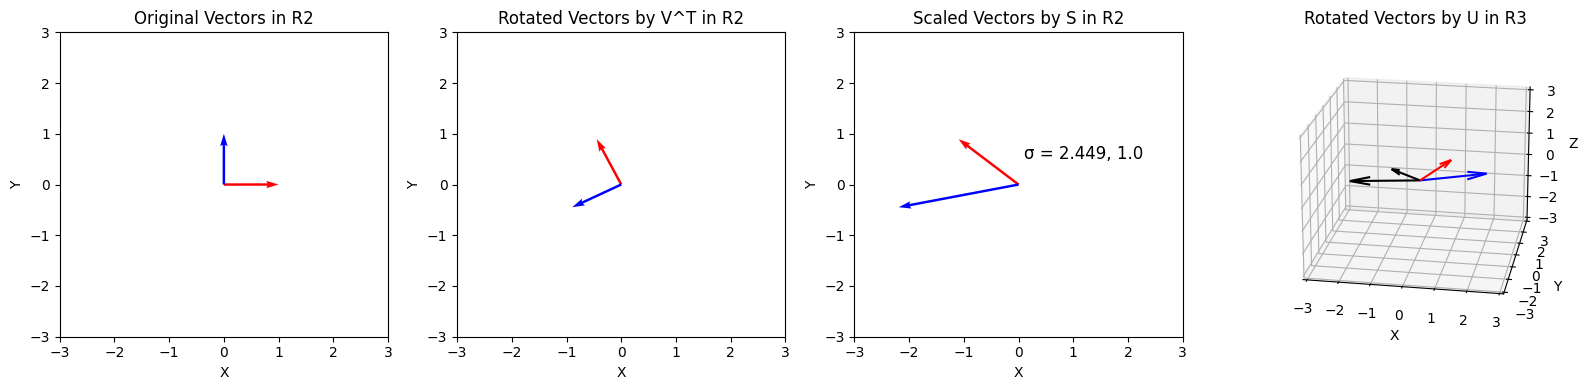

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Defining a 2x3 matrix (transformation from R2 to R3)
A = np.array([[1, 2], [0, 1], [1, 0]])

# Singular Value Decomposition
U, S, VT = np.linalg.svd(A)

fig = plt.figure(figsize=(16, 4))

# Plotting the original vectors
ax1 = fig.add_subplot(141)
ax1.quiver(0, 0, 1, 0, color='r', angles = 'xy', scale_units = 'xy', scale=1)
ax1.quiver(0, 0, 0, 1, color='b', angles = 'xy', scale_units = 'xy', scale=1)
ax1.set_xlim([-3, 3])
ax1.set_ylim([-3, 3])
ax1.set_title('Original Vectors in R2')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')

# Plotting the rotated vectors
ax2 = fig.add_subplot(142)
ax2.quiver(0, 0, VT[0, 0], VT[1, 0], color='r', angles = 'xy', scale_units = 'xy', scale=1)
ax2.quiver(0, 0, VT[0, 1], VT[1, 1], color='b', angles = 'xy', scale_units = 'xy', scale=1)
ax2.set_xlim([-3, 3])
ax2.set_ylim([-3, 3])
ax2.set_title('Rotated Vectors by V^T in R2')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')

# Plotting the scaled vectors
X = np.matmul(np.diag(S), VT)
ax3 = fig.add_subplot(143)
ax3.quiver(0, 0, X[0, 0], X[1, 0], color='r', angles = 'xy', scale_units = 'xy', scale=1)
ax3.quiver(0, 0, X[0, 1], X[1, 1], color='b', angles = 'xy', scale_units = 'xy', scale=1)
ax3.set_xlim([-3, 3])
ax3.set_ylim([-3, 3])
ax3.set_title('Scaled Vectors by S in R2')
ax3.text(0.1, 0.5, f'σ = {round(S[0], 3)}, {round(S[1], 3)}', fontsize=12)
ax3.set_xlabel('X')
ax3.set_ylabel('Y')

# Plotting the rotated vectors in R3
ax3 = fig.add_subplot(144, projection='3d')
ax3.view_init(elev=20, azim=-80, roll=0)
ax3.quiver(0, 0, 0, X[0, 0], X[1, 0], 0, color='black')
ax3.quiver(0, 0, 0, X[0, 1], X[1, 1], 0, color='black')
ax3.quiver(0, 0, 0, A[0, 0], A[1, 0], A[2, 0], color='r')
ax3.quiver(0, 0, 0, A[0, 1], A[1, 1], A[2, 1], color='b')
ax3.set_xlim([-3,3])
ax3.set_ylim([-3,3])
ax3.set_zlim([-3,3])
ax3.set_title('Rotated Vectors by U in R3')
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax3.set_zlabel('Z')

plt.tight_layout()
plt.show()

As seen above, we can decompose any tranformation into rotation, scaling, and another rotation.

## Approximations using SVD

Let's try using SVD to extract information from a sample of data generated by a known distribution.

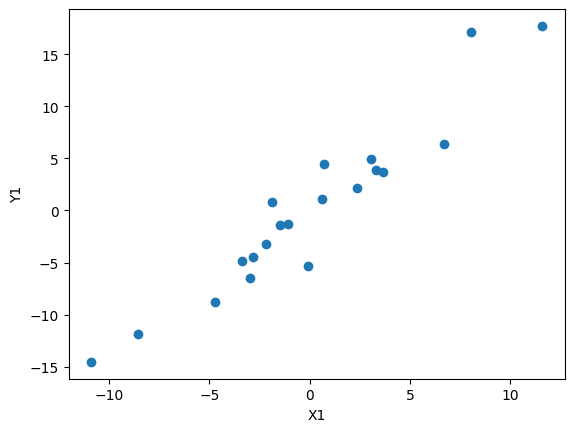

In [2]:
data_points = 20

# Generating data for X1 and Y1
x1 = np.random.normal(0, 5, data_points)
y1 = 1.5 * x1 + np.random.normal(0, 2, data_points)

# Centering the data
x1 -= np.mean(x1)
y1 -= np.mean(y1)

# Plotting the data
plt.scatter(x1, y1)
plt.xlabel('X1')
plt.ylabel('Y1')
plt.show()

Here, we first sample a normal distribution to generate x values, before feeding them into some function (in this case $y = \frac{3}{2}x$). We can then add a term sampled from a normal distribution to the y values to add error to the linear function. Finally, both the x and y values are zero-centered.

The data generated here could represent many distributions found in the real world, such as relationships between weight and height, etc. We can use SVD to extract data from this distribution:

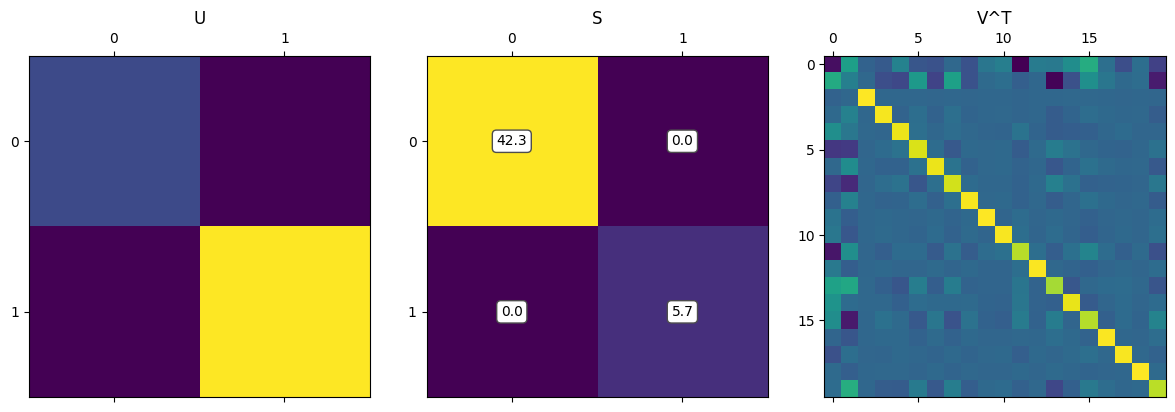

In [3]:
# Creating a matrix from the data
a1 = np.array([x1, y1])

U1, S1, VT1 = np.linalg.svd(a1)

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131)
ax1.matshow(U1)
ax1.set_title('U')

ax2 = fig.add_subplot(132)
ax2.matshow(np.diag(S1))
ax2.set_title('S')
for (i, j), z in np.ndenumerate(np.diag(S1)):
    ax2.text(j, i, '{:0.1f}'.format(z), ha='center', va='center', bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))

ax3 = fig.add_subplot(133)
ax3.matshow(VT1)
ax3.set_title('V^T')

plt.tight_layout()
plt.show()

The most interesting factor matrix to us is $\mathbf \Sigma$, which contains the singular values. This is the matrix that stretches/scales each vector before it is finally rotated. We can reformulate SVD in terms of the singular values, $\sigma$:
$$
    \mathbf A = \mathbf{USV^\mathsf{T}} = \sigma_1 u_1 v_1^\mathsf{T} + \dots + \sigma_r u_r v_r^\mathsf{T}
$$

What does this mean? Because $\sigma_1 \geq \sigma_2 \geq \dots \geq \sigma_r$, we can look at the first singular values to see what the most "important" components are. Specifically, the $u_1$ vector is then the most important *direction* of the data. Let's visualize this:

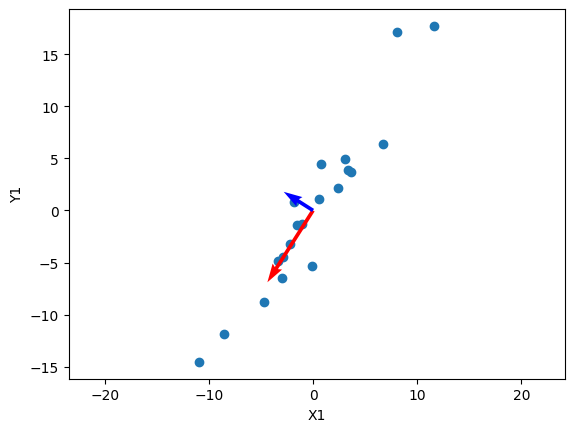

In [4]:
plt.scatter(x1, y1)

# Plotting the principal components
plt.quiver(0, 0, U1[0, 0] * S[0], U1[0, 1] * S[0], angles='xy', scale_units='xy', color='r', scale=0.3)
plt.quiver(0, 0, U1[1, 0] * S[1], U1[1, 1] * S[1], angles='xy', scale_units='xy', color='b', scale=0.3)

plt.xlabel('X1')
plt.ylabel('Y1')
plt.axis('equal')
plt.show()

In this visualization, I've also scaled the vectors by their respective singular values, which shows the "impact" of each principal direction on reconstructing the data. We can see that the blue vector, which represents $u_2$ and $\sigma_2$ are relatively smaller, and we can simplify the data by reconstructing $\mathbf A$ without that direction:

$$
    \mathbf A_2 = \sigma_1 u_1 v_1^\mathsf{T} + \cancel{\sigma_2 u_2 v_2^\mathsf{T}}
$$

The vectors $u_i$ must be orthogonal, and we can see that in the data above. Below I haven't scaled the axes to be relatively square, so the vectors may not appear orthogonal.

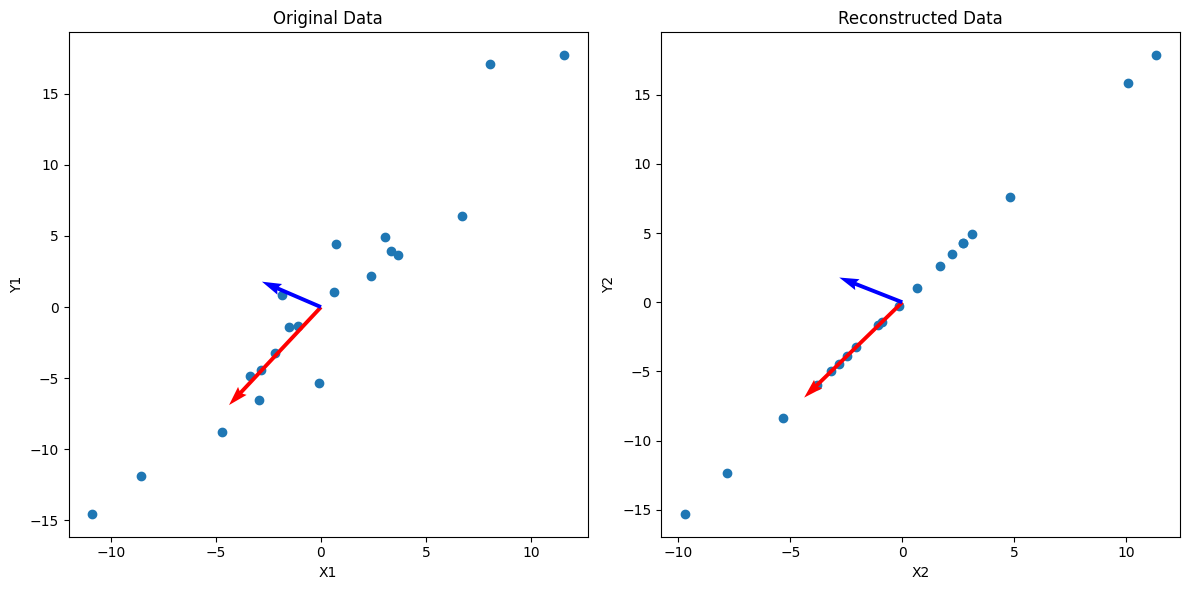

In [5]:
# Reconstructing the data from the first principal component
num_components = 1
a2 = np.matrix(U1[:,:num_components]) * np.diag(S1[:num_components]) * np.matrix(VT1[:num_components,:])
x2 = np.array(a2)[0]
y2 = np.array(a2)[1]

fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(121)
ax1.scatter(x1, y1)
ax1.set_title('Original Data')
ax1.set_xlabel('X1')
ax1.set_ylabel('Y1')
ax1.quiver(0, 0, U1[0, 0] * S[0], U1[1, 0] * S[0], angles='xy', scale_units='xy', color='r', scale=0.3)
ax1.quiver(0, 0, U1[0, 1] * S[1], U1[1, 1] * S[1], angles='xy', scale_units='xy', color='b', scale=0.3)

ax2 = fig.add_subplot(122)
ax2.scatter(x2, y2)
ax2.set_title('Reconstructed Data')
ax2.set_xlabel('X2')
ax2.set_ylabel('Y2')
ax2.quiver(0, 0, U1[0, 0] * S[0], U1[1, 0] * S[0], angles='xy', scale_units='xy', color='r', scale=0.3)
ax2.quiver(0, 0, U1[0, 1] * S[1], U1[1, 1] * S[1], angles='xy', scale_units='xy', color='b', scale=0.3)

plt.tight_layout()
plt.show()

As you can see, we can get an approximation of the data by projecting it onto $u_1$, which is equivalent to reconstructing the data from SVD without the less important $\sigma_i u_i v_i^\mathsf{T}$ terms.

## Image Compression

![image of cat](test_cat.png)
###### Image of a cat.

As we've seen, SVD can be incredibly useful to find important relationships in data, which is especially useful for high-dimensional data. This has numerous applications across machine learning, finance, and data science. One such application of SVD is in image compression. Although there aren't any major image formats using SVD due to its computational intensity, it has uses in other settings as a way to compress data.

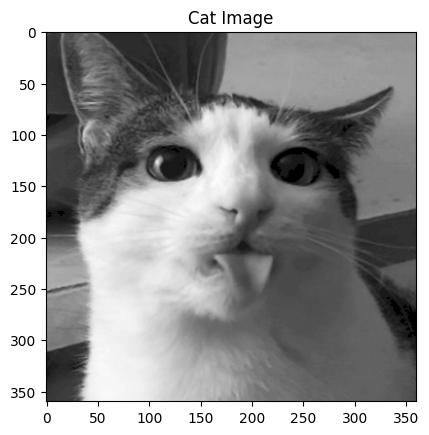

In [6]:
import cv2

image = cv2.imread('test_cat.png', cv2.IMREAD_GRAYSCALE)

plt.imshow(image, cmap='gray')
plt.title('Cat Image')
plt.show()

In [7]:
U, S, Vt = np.linalg.svd(image, full_matrices=False)
U.shape, S.shape, Vt.shape

((360, 360), (360,), (360, 360))

In [8]:
# First and last 10 singular values
S[:10], S[-10:]

(array([40497.89197752, 12006.37680189,  7284.07461331,  4210.78017967,
         3144.93540114,  2738.59937892,  1791.84397953,  1692.9623595 ,
         1414.15879092,  1290.33684826]),
 array([0.74816783, 0.60915404, 0.550812  , 0.49960596, 0.42255608,
        0.36551517, 0.27923866, 0.19124131, 0.13077745, 0.06257808]))

As seen above, we can load in an image and represent it as a matrix of integers, with each integer representing the brightness of the pixel in its position.

There are also 360 singular values, with the smallest and largest being several orders of magnitude apart. This indicates that there are many principal directions that have minimal impact on the image, and the $\sigma_i u_i v_i^\mathsf{T}$ terms corresponding to those values can likely be removed. Let's what happens when we remove all but the first component ($\sigma_1 \approx 40498$).

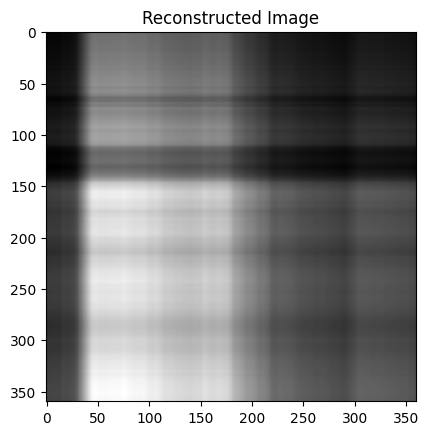

In [9]:
reconstructed_image = np.matrix(U[:,:1]) * np.diag(S[:1]) * np.matrix(Vt[:1,:])
plt.imshow(reconstructed_image, cmap='gray')
plt.title('Reconstructed Image')
plt.show()

There isn't much of the cat, but the brightness appears to be in the right places. I thought the pattern of this compressed image is interesting and was worth investigating:

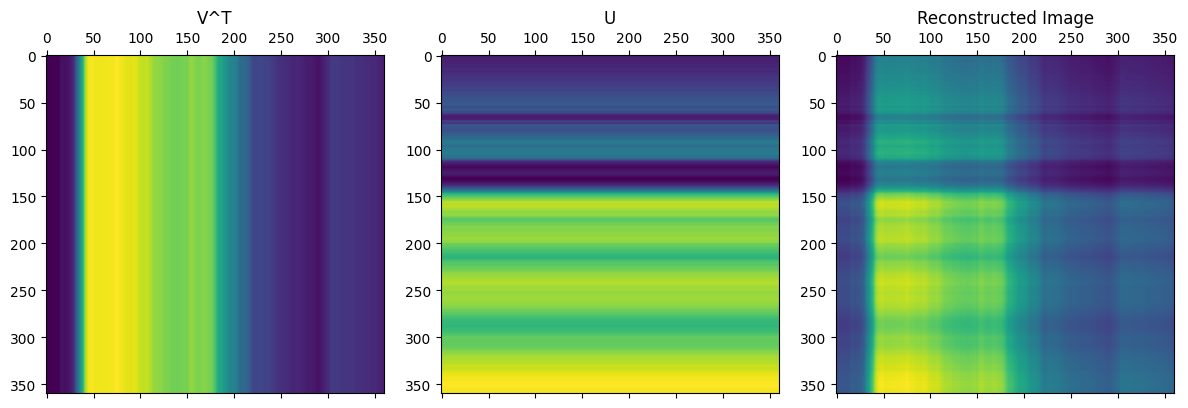

In [10]:
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(131)
ax1.matshow(-np.ones_like(np.matrix(Vt[:1,:])).T * np.matrix(Vt[:1,:]))
ax1.set_title('V^T')

ax2 = fig.add_subplot(132)
ax2.matshow(-(np.ones_like(np.matrix(U[:,:1])) * np.matrix(U[:,:1]).T).T)
ax2.set_title('U')

ax3 = fig.add_subplot(133)
ax3.matshow(reconstructed_image)
ax3.set_title('Reconstructed Image')

plt.tight_layout()
plt.show()

As seen from the code above, the image is only from a single matrix multiplication between two vectors, and the resulting pattern makes sense. From the formula for SVD, we simply add more of these types of matrices to get closer to the complete image.

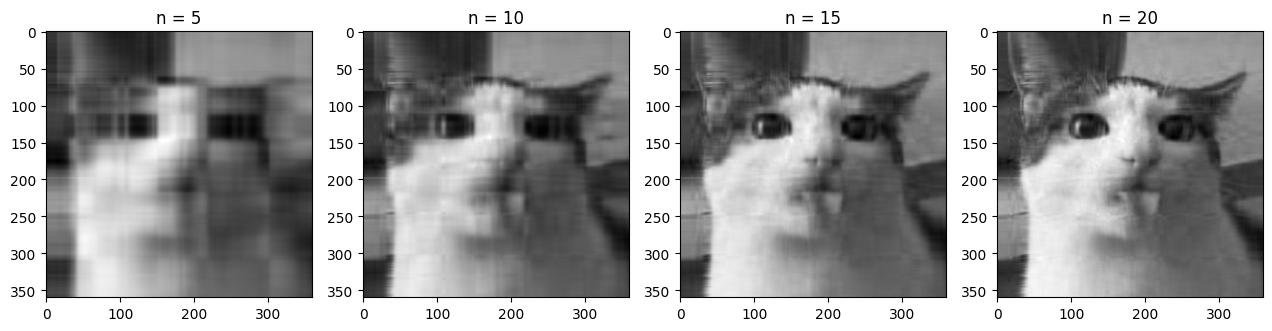

In [11]:
plt.figure(figsize=(16,4))

start, end, step = 5, 25, 5
for i in range(start, end, step):
    plt.subplot(1, (end - start) // step + 1, (i - start) // step + 1)
    reconstructed = np.matrix(U[:, :i]) * np.diag(S[:i]) * np.matrix(Vt[:i, :])
    plt.imshow(reconstructed, cmap='gray')
    plt.title('n = %s' % i)

plt.tight_layout()
plt.show()

As we increase the number of singular values used in the reconstruction, the image is much clearer and we can clearly see the original image within the first 20 singular values. In the code below you can change the value of `n` to change the compression rate of the image.

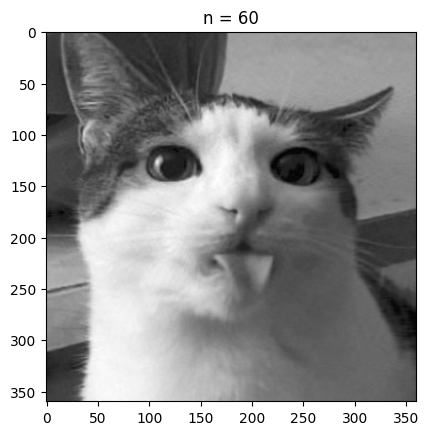

In [12]:
n = 60
reconstructed = np.matrix(U[:, :n]) * np.diag(S[:n]) * np.matrix(Vt[:n, :])
plt.imshow(reconstructed, cmap='gray')
plt.title('n = %s' % n)
plt.show()

With n equal to 60 we are already fairly close to the quality of the original image, but the size of the compressed image is roughly a sixth of the original size.

Doing this with a grayscale image is great, but how would color images work?

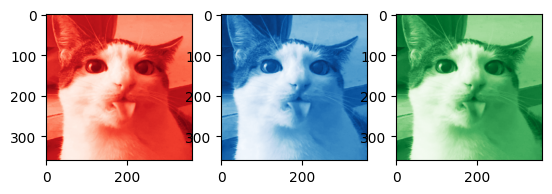

In [13]:
color_image = cv2.imread('test_cat.png')
B, G, R = cv2.split(color_image)

plt.subplot(1, 3, 1)
plt.imshow(R, cmap='Reds_r')
plt.subplot(1, 3, 2)
plt.imshow(B, cmap='Blues_r')
plt.subplot(1, 3, 3)
plt.imshow(G, cmap='Greens_r')
plt.show()

Getting the code to work in color is pretty straightforward: we first separate the image into three seperate channels, in this case into red, green, and blue channels.

Alternatively the image could be separated into HSV (hue, saturation, value) channels, which could yield a larger improvement on size if finetuned (perhaps saturation information requires fewer singular values for a clear image, but hue information needs more).

We can then perform SVD on each of the color channels, before adding them back together. Note that `np.clip` is used in the code below as some of the color channels could have negative pixel values at lower values of n, which creates visual artifacts.

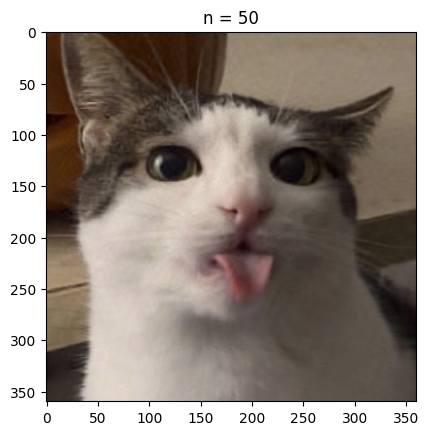

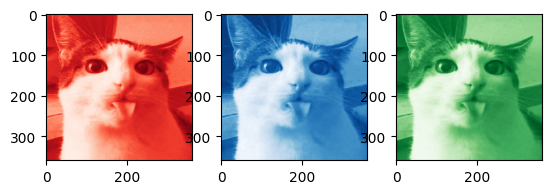

In [14]:
# SVD for each channel
U_R, S_R, Vt_R = np.linalg.svd(R, full_matrices=False)
U_G, S_G, Vt_G = np.linalg.svd(G, full_matrices=False)
U_B, S_B, Vt_B = np.linalg.svd(B, full_matrices=False)

n = 50  # rank approximation parameter
R_compressed = np.matrix(U_R[:, :n]) * np.diag(S_R[:n]) * np.matrix(Vt_R[:n, :])
G_compressed = np.matrix(U_G[:, :n]) * np.diag(S_G[:n]) * np.matrix(Vt_G[:n, :])
B_compressed = np.matrix(U_B[:, :n]) * np.diag(S_B[:n]) * np.matrix(Vt_B[:n, :])

# Combining the compressed channels
compressed_image = cv2.merge([np.clip(R_compressed, 1, 255), np.clip(G_compressed, 1, 255), np.clip(B_compressed, 1, 255)])
compressed_image = compressed_image.astype(np.uint8)
plt.imshow(compressed_image)
plt.title('n = %s' % n)
plt.show()

# Plotting the compressed RGB channels
plt.subplot(1, 3, 1)
plt.imshow(R_compressed, cmap='Reds_r')
plt.subplot(1, 3, 2)
plt.imshow(B_compressed, cmap='Blues_r')
plt.subplot(1, 3, 3)
plt.imshow(G_compressed, cmap='Greens_r')
plt.show()

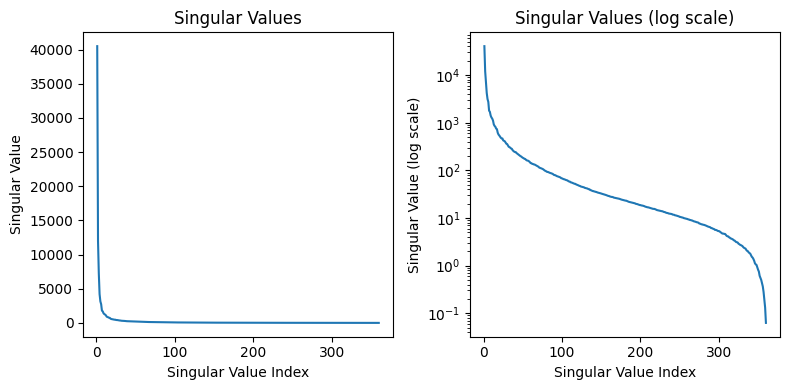

In [15]:
# Plotting the singular values
plt.figure(figsize=(8,4))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(S) + 1), S)
plt.xlabel('Singular Value Index')
plt.ylabel('Singular Value')
plt.title('Singular Values')

plt.subplot(1, 2, 2)
plt.plot(range(1, len(S) + 1), S)
plt.xlabel('Singular Value Index')
plt.ylabel('Singular Value (log scale)')
plt.title('Singular Values (log scale)')
plt.yscale('log')

plt.tight_layout()
plt.show()


Some good questions to ask are what type of images this compression useful for or what parameter to pick when compressing these images. Analyzing the singular values as done above can tell us how important each singular value is. Because the singular values have a significant drop off in value after the first few, we can compress this image by a lot (removing the data associated with the smaller singular values). If we wanted to build a format and storage system around this compression algorithm, we may choose a threshold value for the minimum singular value magnitude included. This allows us to have a consistent cutoff for low information matrices among all images we may store.

To see something where SVD compression is less useful, we create a discrete noise image:

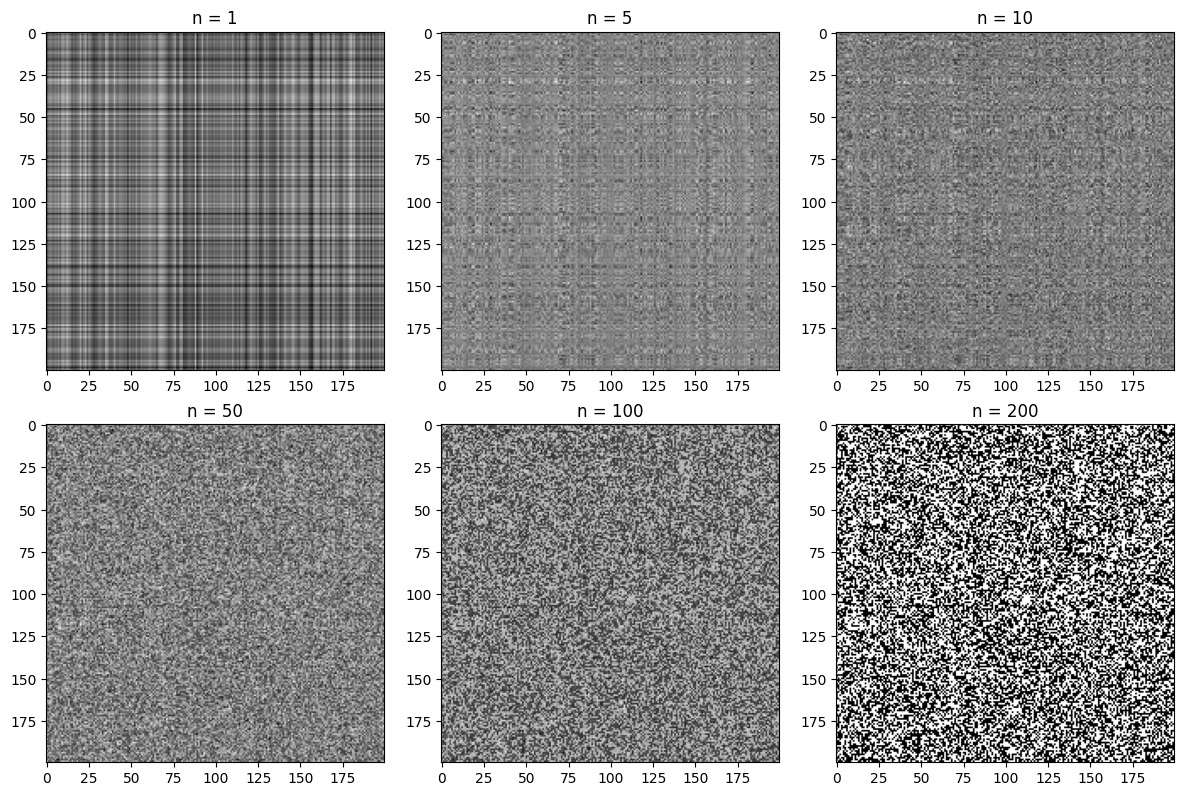

In [16]:
noise = np.random.randint(0,2,size=(200,200))
U_N, S_N, Vt_N = np.linalg.svd(noise, full_matrices=False)

# Plotting the compressed noise for different values of n
components = [1, 5, 10, 50, 100, 200]

fig = plt.figure(figsize=(12,8))

for i in range(len(components)):
    plt.subplot(2, 3, i+1)
    noise_compressed = np.matrix(U_N[:, :components[i]]) * np.diag(S_N[:components[i]]) * np.matrix(Vt_N[:components[i], :])
    plt.imshow(noise_compressed, cmap='gray')
    plt.title('n = %s' % components[i])

plt.tight_layout()
plt.show()

In [17]:
S_N[:10], S_N[-10:]

(array([100.49086905,  13.95872853,  13.53626008,  13.29897241,
         13.06786974,  13.03467818,  12.87841725,  12.78114789,
         12.69684577,  12.62065024]),
 array([0.57058805, 0.53182389, 0.4822589 , 0.38376719, 0.25732285,
        0.25321151, 0.17954021, 0.0908823 , 0.04676295, 0.01503554]))

As seen above, the difference in magnitude between the most significant singular value and the smallest is less than in the cat image. The first singular value is also almost an entire magnitude larger than the next largest value. Interestingly enough, this seems to be the result regardless of the random seeding (this may be a result of some regularity in how the random sample is produced by `np.random`). Let's plot the values:

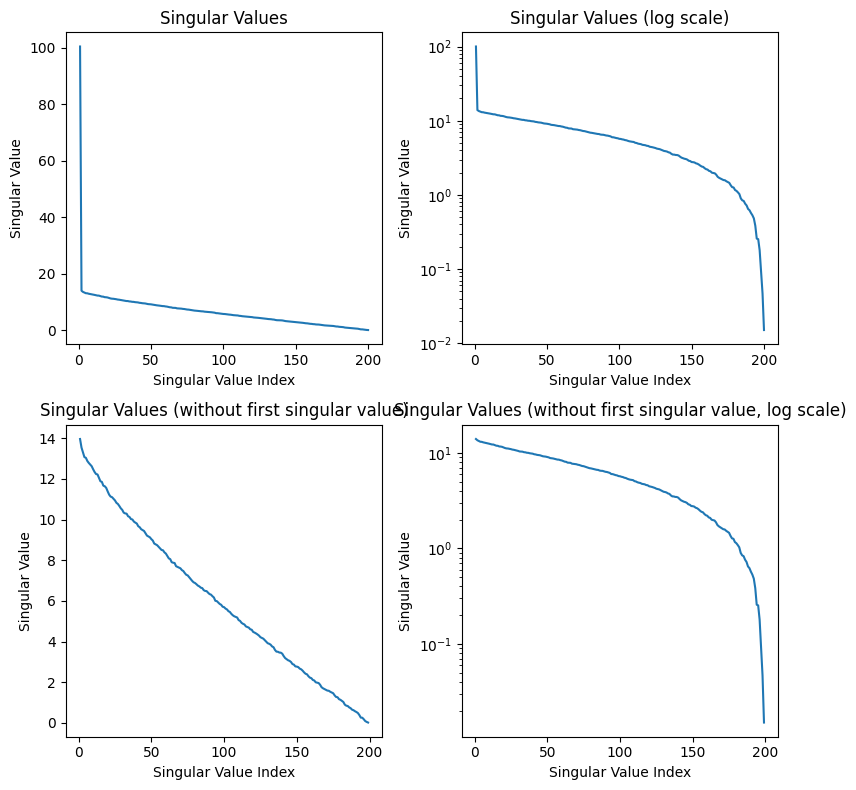

In [18]:
def plot_singular_values(S, title):
    plt.plot(range(1, len(S) + 1), S)
    plt.xlabel('Singular Value Index')
    plt.ylabel('Singular Value')
    plt.title(title)

plt.figure(figsize=(8, 8))

plt.subplot(2, 2, 1)
plot_singular_values(S_N, 'Singular Values')

plt.subplot(2, 2, 2)
plot_singular_values(S_N, 'Singular Values (log scale)')
plt.yscale('log')

plt.subplot(2, 2, 3)
plot_singular_values(S_N[1:], 'Singular Values (without first singular value)')

plt.subplot(2, 2, 4)
plot_singular_values(S_N[1:], 'Singular Values (without first singular value, log scale)')
plt.yscale('log')

plt.tight_layout()
plt.show()

After the first singular value, we see a linear relationship between the singular value index and the magnitude of the singular value. Once again, I believe the first singular value being so high is a result of the `np.random.randint` function, and we can see the pattern in the rest of the values in the bottom graphs. Although it is difficult to see from the examples compressed above, SVD compression is terrible for this noise image, and we lose a ton of information because the singular values do not drop off exponentially. We end up losing a lot of information about the image when we decrease the singular value components kept, and this is not a good image to compress.

How about an image that may be perfect for this compression algorithm?

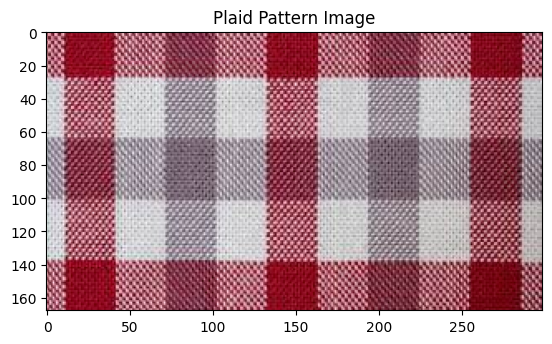

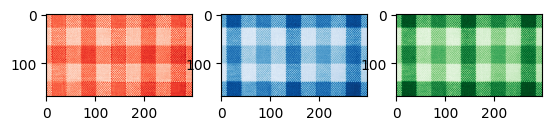

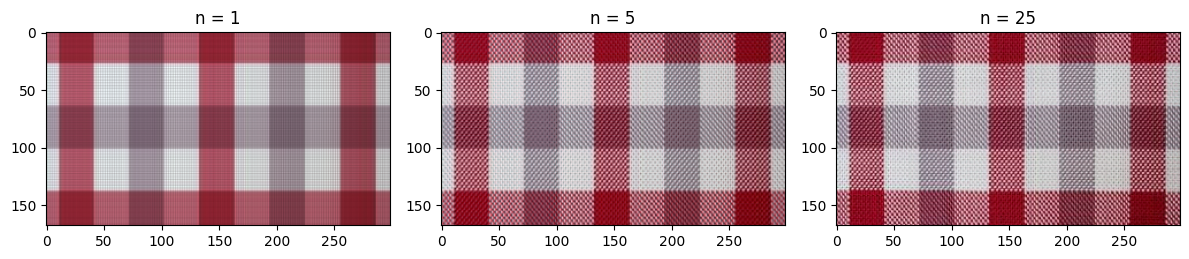

In [19]:
# Show plaid pattern image
plaid_image = cv2.imread('plaid_pattern.jpg')
plt.imshow(plaid_image[:,:,::-1])
plt.title('Plaid Pattern Image')
plt.show()

# Split the image into R, G, and B color channels
B, G, R = cv2.split(plaid_image)
plt.subplot(1, 3, 1)
plt.imshow(R, cmap='Reds_r')
plt.subplot(1, 3, 2)
plt.imshow(B, cmap='Blues_r')
plt.subplot(1, 3, 3)
plt.imshow(G, cmap='Greens_r')
plt.show()

def rgb_approximation(R, G, B, n):
    U_R, S_R, Vt_R = np.linalg.svd(R, full_matrices=False)
    U_G, S_G, Vt_G = np.linalg.svd(G, full_matrices=False)
    U_B, S_B, Vt_B = np.linalg.svd(B, full_matrices=False)

    R_compressed = np.matrix(U_R[:, :n]) * np.diag(S_R[:n]) * np.matrix(Vt_R[:n, :])
    G_compressed = np.matrix(U_G[:, :n]) * np.diag(S_G[:n]) * np.matrix(Vt_G[:n, :])
    B_compressed = np.matrix(U_B[:, :n]) * np.diag(S_B[:n]) * np.matrix(Vt_B[:n, :])

    compressed_image = cv2.merge([np.clip(R_compressed, 1, 255), np.clip(G_compressed, 1, 255), np.clip(B_compressed, 1, 255)])
    compressed_image = compressed_image.astype(np.uint8)

    return compressed_image

n_values = [1, 5, 25]

plt.figure(figsize=(12, 6))
for i, n in enumerate(n_values):
    plt.subplot(1, len(n_values), i+1)
    plt.imshow(rgb_approximation(R, G, B, n))
    plt.title('n = %s' % n)

plt.tight_layout()
plt.show()


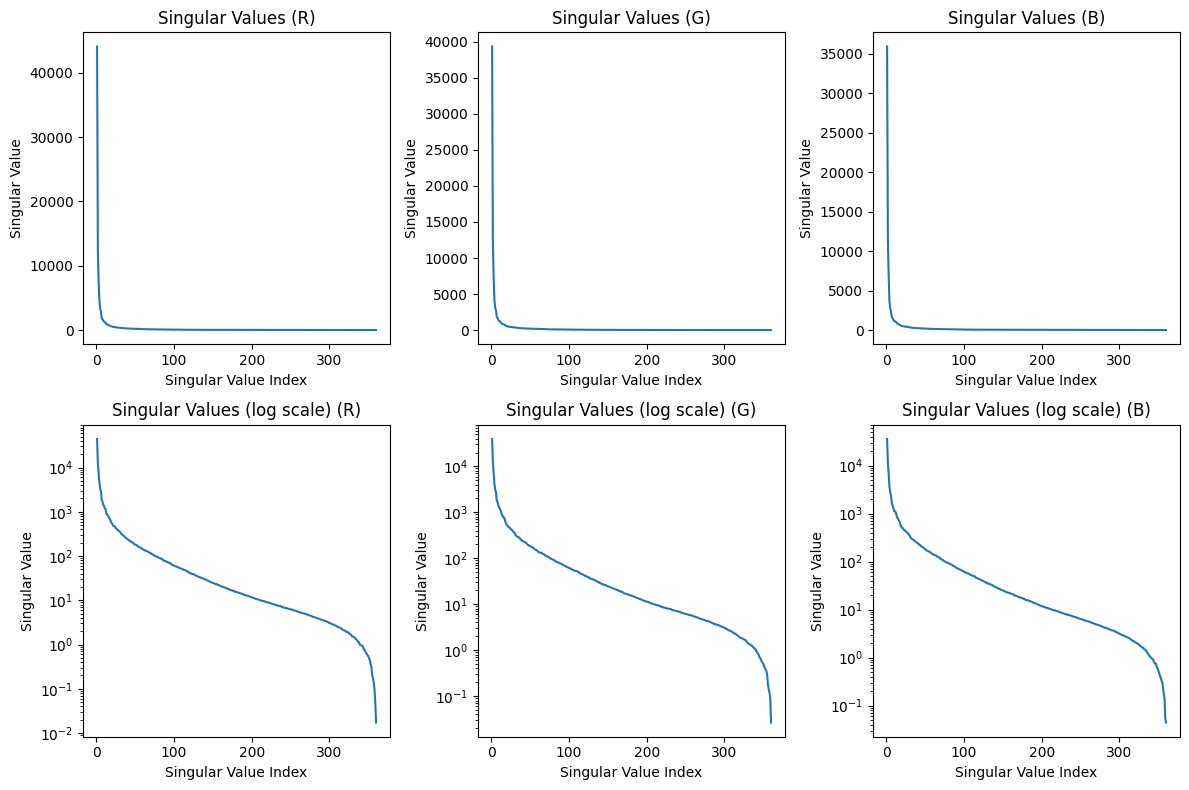

In [20]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plot_singular_values(S_R, 'Singular Values (R)')

plt.subplot(2, 3, 2)
plot_singular_values(S_G, 'Singular Values (G)')

plt.subplot(2, 3, 3)
plot_singular_values(S_B, 'Singular Values (B)')

plt.subplot(2, 3, 4)
plot_singular_values(S_R, 'Singular Values (log scale) (R)')
plt.yscale('log')

plt.subplot(2, 3, 5)
plot_singular_values(S_G, 'Singular Values (log scale) (G)')
plt.yscale('log')

plt.subplot(2, 3, 6)
plot_singular_values(S_B, 'Singular Values (log scale) (B)')
plt.yscale('log')

plt.tight_layout()
plt.show()

Hopefully from the code above it is clear that SVD compression can capture a lot of the basic structure of the photo! Even when n = 1, we can clearly see the plaid pattern and some faint gridlines. A lot more of the detail is captured by n = 5, and around n = 25, the differences between the compressed image and the original are imperceptible.

This is clearly a best case scenario for SVD compression, and I'm certain that the compression wouldn't work nearly as well for a plaid pattern tilted 45 degrees. However, this experiment shows the usefulness of SVD as a simple way to analyze high-dimensional data.

## JPEG?

As a brief sidenote, you may have noticed that for lower values of n, the cat image had a similar appearance to heavily compressed .jpg files.

![example of a jpg image](jpg_example.jpg)

###### JPG example

You may have also noticed that I said there are *no major image formats that perform SVD compression*. Although the JPEG format doesn't use singular value decomposition, the compression is based on a surprisingly similar principle.

JPEG compression is based on the discrete cosine transform, which involves approximating the sequence of pixel values in an image with the sum of several discrete cosine functions oscillating at different frequencies. This means that "high-frequency data", or large differences in color between adjacent pixels, is lost. In many cases, this is acceptable and the differences in image quality are negligble. Furthermore, this compression by discrete cosine transform is applied to JPEGs in blocks, meaning that at high compression rates there can be perceptible differences from one block to the next, which can resemble the appearance of images compressed with SVD.

When discussing compression of color images, I mentioned that another way of encoding pixel data, such as HSV, may be useful over RGB as a way to compress images, especially if we can find a color space that aligns with the way humans see color. JPEG uses this concept to its advantage by encoding data in the YCbCr color spaces, which seperates color into luminance ($Y'$) and chrominance ($C_b$ and $C_r$). Human eyes are more sensitive to changes in the luminance rather than changes in chrominance, so the blue-difference and red-difference chrominance components can be compressed further. This is also why highly compressed JPEG images may have color shifts in the way it does: the Cr and Cb spectrum is compressed into fewer and fewer possible hues. Below are some visualizations of the RGB and YCbCr color spaces.

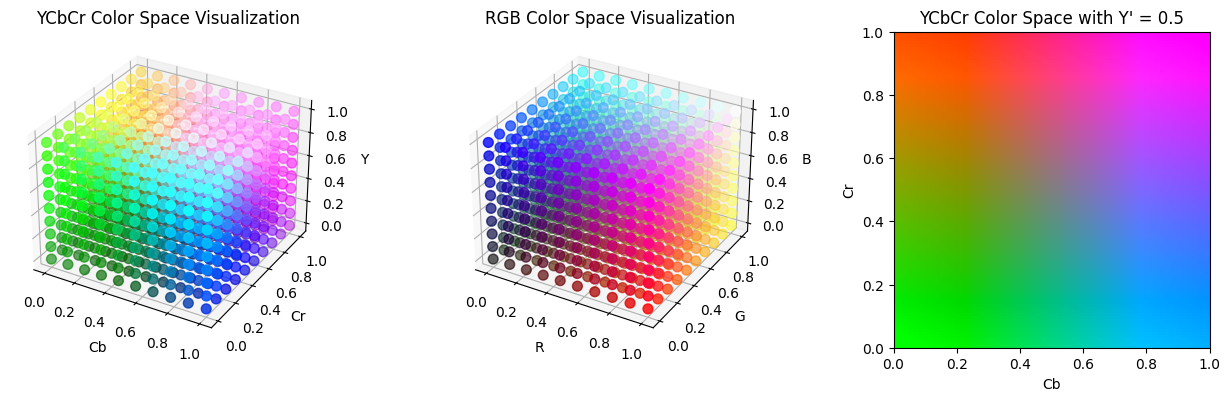

In [21]:
from skimage.color import ycbcr2rgb

def ycbcr_to_rgb(Y, Cb, Cr):
    Y = Y * 219 + 16
    Cb = Cb * 224 + 16
    Cr = Cr * 224 + 16
    YCbCr =  np.stack([Y, Cb, Cr], axis=-1)
    return np.clip(ycbcr2rgb(YCbCr), 0, 1)

fig = plt.figure(figsize=(13, 4))

# YCbCr color space
ax1 = fig.add_subplot(131, projection='3d')
Y, Cb, Cr = np.meshgrid(np.linspace(0, 1, 10), np.linspace(0, 1, 10), np.linspace(0, 1, 10))
RGB = ycbcr_to_rgb(Y, Cb, Cr)

ax1.scatter(Cb.flatten(), Cr.flatten(), Y.flatten(), c=RGB.reshape(-1, 3), s=50)

ax1.set_xlabel('Cb')
ax1.set_ylabel('Cr')
ax1.set_zlabel('Y')
ax1.set_title('YCbCr Color Space Visualization')


# RGB color space
ax2 = fig.add_subplot(132, projection='3d')
R, G, B = np.meshgrid(np.linspace(0, 1, 10), np.linspace(0, 1, 10), np.linspace(0, 1, 10))

ax2.scatter(R.flatten(), G.flatten(), B.flatten(), c=np.stack([R, G, B], axis=-1).reshape(-1, 3), s=50)

ax2.set_xlabel('R')
ax2.set_ylabel('G')
ax2.set_zlabel('B')
ax2.set_title('RGB Color Space Visualization')


# YCbCr color space with fixed Y'
ax3 = fig.add_subplot(133)
luma = 0.5
Cb_plane, Cr_plane = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
RGB = ycbcr_to_rgb(np.full(Cb_plane.shape, luma), Cb_plane, Cr_plane)

ax3.imshow(RGB, extent=[0, 1, 0, 1], origin='lower')

ax3.set_xlabel('Cb')
ax3.set_ylabel('Cr')
ax3.set_title(f'YCbCr Color Space with Y\' = {luma}')


plt.tight_layout()
plt.show()